## Trabalhando com Big Data - 25 Milhões de Registros
fonte: https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd   

In [3]:
!dir

 O volume na unidade C ‚ Windows10
 O N£mero de S‚rie do Volume ‚ E699-979D

 Pasta de C:\Users\valen\Dropbox\AULAS-REMOTAS\Alunos-UEPB-TopicosEspeciaisEmBancoDeDados\Python-Para-Analise-de-Dados\MANHA

03/02/2022  11:21    <DIR>          .
03/02/2022  11:21    <DIR>          ..
03/02/2022  10:51    <DIR>          .ipynb_checkpoints
09/01/2022  18:42          (28.169) Aula-01--16-Dezembro-2021-ConceitosBasicos-Turma-Manha.ipynb
01/02/2022  10:55          (37.414) Aula-02-Listas-Tuplas-Dicion rios-DataFrames-21-dezembro-2021-MANHA.ipynb
01/02/2022  11:19             9.892 Aula-03-DataFrames-II-23-dezembro-2021-MANHA.ipynb
01/02/2022  20:29           280.136 Aula-03-DataFrames-III-01-fevereiro-2022-MANHA.ipynb
01/02/2022  11:17           113.281 covid19-22-janeiro-2022.csv
09/01/2022  18:42          (92.027) covid19-23-dez-2021.csv
03/02/2022  01:35    <DIR>          dask-worker-space
03/02/2022  10:22   (3.480.869.232) filmes-2022.csv
03/02/2022  10:54           (1.895) List comprehensi

In [5]:
!dir -ilah /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m

Op‡Æo inv lida - "Users".


In [6]:
!head /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/movies.csv

'head' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [11]:
url = '/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m' + '/' + 'ratings.csv'

url = 'C:\\Users\\valen\\Dropbox\\AULAS-REMOTAS\\BD-ESTATISTICA-MANHA\\datasets\\ml-20m\\'  + 'ratings.csv'
url

'C:\\Users\\valen\\Dropbox\\AULAS-REMOTAS\\BD-ESTATISTICA-MANHA\\datasets\\ml-20m\\ratings.csv'

In [12]:
%%time

dfratings = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfratings)))

Wall time: 0 ns
total de registros: 20,000,263


In [13]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [14]:
url = 'C:\\Users\\valen\\Dropbox\\AULAS-REMOTAS\\BD-ESTATISTICA-MANHA\\datasets\\ml-20m\\'  + 'movies.csv'
url

'C:\\Users\\valen\\Dropbox\\AULAS-REMOTAS\\BD-ESTATISTICA-MANHA\\datasets\\ml-20m\\movies.csv'

In [15]:
%%time

dfmovies = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfmovies)))

total de registros: 27,278
Wall time: 107 ms


In [16]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
%%time

dfdrama_acao = dfmovies[ dfmovies.genres.str.contains('Drama') | # OR  
                        dfmovies.genres.str.contains('Action')  ]
print('total de registros: {:,d}'.format(len(dfdrama_acao)))
dfdrama_acao.head()

total de registros: 15,661
Wall time: 94.9 ms


,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
10,11,"American President, The (1995)",Comedy|Drama|Romance


# Obter todos os generos

In [18]:
genres = 'Comedy|Drama|Romance'
generos = genres.split('|')
generos

['Comedy', 'Drama', 'Romance']

In [19]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
%%time

set_generos = set()

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    set_generos.update(generos)
    
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Thriller', 'Action', 'Comedy', 'Musical', 'Crime', 'Horror', 'Mystery', 'Drama', 'IMAX', 'Documentary', 'War', '(no genres listed)', 'Film-Noir', 'Animation', 'Adventure', 'Sci-Fi', 'Fantasy', 'Romance', 'Children', 'Western']
Wall time: 2.96 s


## Criando colunas Genero - individuais

In [21]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
%%time

for genero in generos:
    dfmovies[genero] = False
    
dfmovies.head()

Wall time: 36.8 ms


,movieId,title,genres,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,...,War,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
len(dfmovies)

27278

In [24]:
%%time 

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    for genero in generos:
        dfmovies.at[index, genero] = True
    
dfmovies.head()

Wall time: 4.45 s


,movieId,title,genres,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,...,War,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,True,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
dfmovies.Drama.value_counts()

False    13934
True     13344
Name: Drama, dtype: int64

In [26]:
del dfmovies['genres']
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,War,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# criar estatistica de generos

In [27]:
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Thriller', 'Action', 'Comedy', 'Musical', 'Crime', 'Horror', 'Mystery', 'Drama', 'IMAX', 'Documentary', 'War', '(no genres listed)', 'Film-Noir', 'Animation', 'Adventure', 'Sci-Fi', 'Fantasy', 'Romance', 'Children', 'Western']


In [28]:
dfmovies.Horror.value_counts()

False    24667
True      2611
Name: Horror, dtype: int64

In [29]:
print(generos)

['Thriller', 'Action', 'Comedy', 'Musical', 'Crime', 'Horror', 'Mystery', 'Drama', 'IMAX', 'Documentary', 'War', '(no genres listed)', 'Film-Noir', 'Animation', 'Adventure', 'Sci-Fi', 'Fantasy', 'Romance', 'Children', 'Western']


In [30]:
for genero in generos:
    count_genero = dfmovies[genero].sum()
    print(genero, count_genero)
    break

Thriller 4178


In [31]:
dict_genero = {}
for genero in generos:
    count_genero = dfmovies[genero].sum()
    dict_genero[genero] = count_genero

dict_genero

{'Thriller': 4178,
 'Action': 3520,
 'Comedy': 8374,
 'Musical': 1036,
 'Crime': 2939,
 'Horror': 2611,
 'Mystery': 1514,
 'Drama': 13344,
 'IMAX': 196,
 'Documentary': 2471,
 'War': 1194,
 '(no genres listed)': 246,
 'Film-Noir': 330,
 'Animation': 1027,
 'Adventure': 2329,
 'Sci-Fi': 1743,
 'Fantasy': 1412,
 'Romance': 4127,
 'Children': 1139,
 'Western': 676}

In [32]:
df_genero_cont = pd.DataFrame.from_dict(dict_genero, orient='index').reset_index()
df_genero_cont

,index,0
0,Thriller,4178
1,Action,3520
2,Comedy,8374
3,Musical,1036
4,Crime,2939
5,Horror,2611
6,Mystery,1514
7,Drama,13344
8,IMAX,196
9,Documentary,2471


In [33]:
df_genero_cont.columns = ['genero', 'total']
df_genero_cont

,genero,total
0,Thriller,4178
1,Action,3520
2,Comedy,8374
3,Musical,1036
4,Crime,2939
5,Horror,2611
6,Mystery,1514
7,Drama,13344
8,IMAX,196
9,Documentary,2471


In [34]:
dfo = df_genero_cont.sort_values(by='total', ascending=False).reset_index(drop=True)
dfo

,genero,total
0,Drama,13344
1,Comedy,8374
2,Thriller,4178
3,Romance,4127
4,Action,3520
5,Crime,2939
6,Horror,2611
7,Documentary,2471
8,Adventure,2329
9,Sci-Fi,1743


# Capturando o ano

In [35]:
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,War,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
x = 'Father of the Bride Part II (1995)'
x.find(')')

33

In [40]:
x = 'Father of the Bride Part II (1995)'
x.split('(')

['Father of the Bride Part II ', '1995)']

In [37]:
type(x)

str

In [38]:
x = 'Father of the Bride Part II'
x.find(')')

-1

In [39]:
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,War,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,True,False,True,False
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
%%time 

import numpy as np

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] 
                                       if x.find(')') != -1 
                                       else np.nan)
dfmovies.head()

Wall time: 51 ms


,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,1995)
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,1995)
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1995)
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,1995)
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995)


In [42]:
dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') 
                                     if type(x) == str 
                                     else x)
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,1995
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,1995
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1995
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [43]:
print(dfmovies.ano.value_counts())

2013                         888
2009                         878
2012                         852
2011                         831
2008                         778
                            ... 
Bienvenue chez les Rozes       1
L'horloger de Saint-Paul       1
Nyfes                          1
Nikutai no mon                 1
1891                           1
Name: ano, Length: 5341, dtype: int64


In [46]:
import re

x1 = '1993'
x2 = '1 2 title'
datas = r'^([1-9][0-9][0-9][0-9])'

if re.match(datas, x1):
    print('ok')
if not re.match(datas, x2):
    print('ok nao data')

ok
ok nao data


In [47]:
datas = r'^([0-9][0-9][0-9][0-9])'

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] 
                                       if x.find(')') != -1  
                                       else np.nan)

dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') 
                                     if type(x) == str 
                                     else x)

dfmovies['ano'] = dfmovies.ano.apply(lambda x : x[:4] 
                                     if x is not np.nan and 
                                             re.match(datas, x[:4]) 
                                     else np.nan)
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,1995
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,1995
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1995
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [48]:
dfmovies.ano.value_counts()

2013    902
2009    885
2012    872
2011    850
2008    785
       ... 
1913      1
1893      1
1901      1
1732      1
1891      1
Name: ano, Length: 118, dtype: int64

In [49]:
len(dfmovies.ano.unique())

119

In [50]:
print(dfmovies.ano.unique())

['1995' nan '1994' '1996' '1976' '1992' '1993' '1977' '1965' '1982' '1985'
 '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1970' '1968' '1980'
 '1988' '1975' '1986' '1948' '1943' '1964' '1950' '1946' '1973' '1997'
 '1974' '1972' '1998' '1933' '1952' '1951' '1957' '1961' '1958' '1954'
 '1934' '1944' '1959' '1960' '1963' '1942' '1941' '1953' '1939' '1947'
 '1945' '1955' '1938' '1935' '1936' '1956' '1926' '1949' '1932' '1971'
 '1979' '1967' '1987' '1978' '1962' '1983' '1984' '1931' '1999' '1927'
 '1929' '1930' '1966' '1928' '1925' '1914' '2000' '1919' '1923' '1922'
 '1920' '1918' '1921' '2001' '1732' '2002' '2003' '1915' '1924' '2004'
 '1916' '1917' '2005' '2006' '1903' '2007' '2008' '2009' '2010' '1913'
 '2011' '1894' '1912' '2012' '1910' '1898' '1901' '1893' '2013' '1896'
 '1000' '2014' '1895' '2015' '1909' '1900' '1905' '1891']


In [51]:
dfmovies.ano.isnull().sum(), len(dfmovies.ano)

(5214, 27278)

In [52]:
dfmovies.ano.value_counts()

2013    902
2009    885
2012    872
2011    850
2008    785
       ... 
1913      1
1893      1
1901      1
1732      1
1891      1
Name: ano, Length: 118, dtype: int64

In [53]:
dfanofilmes = dfmovies.ano.value_counts().to_frame().reset_index()
dfanofilmes.columns = ['ano', 'total_filmes']
dfanofilmes.head()

,ano,total_filmes
0,2013,902
1,2009,885
2,2012,872
3,2011,850
4,2008,785


In [54]:
dfanofilmes = dfanofilmes.sort_values(by='total_filmes', ascending=False).reset_index(drop=True)
dfanofilmes.head(10)

,ano,total_filmes
0,2013,902
1,2009,885
2,2012,872
3,2011,850
4,2008,785
5,2010,766
6,2007,724
7,2014,701
8,2006,672
9,2005,591


<AxesSubplot:xlabel='total_filmes', ylabel='ano'>

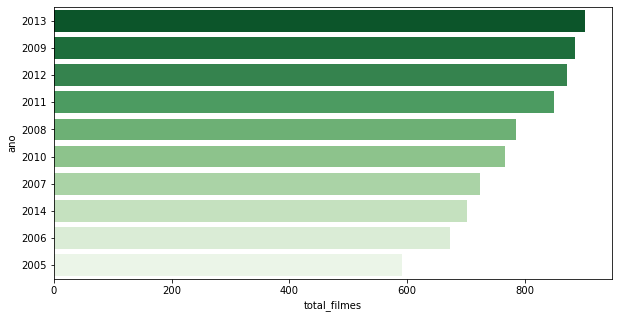

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.barplot(x='total_filmes', y='ano', data=dfanofilmes[:10], palette='Greens_r')

# Join - inner join

In [60]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [61]:
dfmovies.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,(no genres listed),Film-Noir,Animation,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,1995
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,1995
2,3,Grumpier Old Men (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1995
3,4,Waiting to Exhale (1995),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [62]:
%%time

dffilmes =  pd.merge(dfmovies, dfratings, left_on='movieId', right_on='movieId', how="inner")
print('total de registros: {:,d}'.format(len(dffilmes)))
dffilmes.head()

total de registros: 20,000,263
Wall time: 13.9 s


,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano,userId,rating,timestamp
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,3,4.0,944919407
1,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,6,5.0,858275452
2,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,8,4.0,833981871
3,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,10,4.0,943497887
4,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,11,4.5,1230858821


In [63]:
dffilmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movieId             int64  
 1   title               object 
 2   Thriller            bool   
 3   Action              bool   
 4   Comedy              bool   
 5   Musical             bool   
 6   Crime               bool   
 7   Horror              bool   
 8   Mystery             bool   
 9   Drama               bool   
 10  IMAX                bool   
 11  Documentary         bool   
 12  War                 bool   
 13  (no genres listed)  bool   
 14  Film-Noir           bool   
 15  Animation           bool   
 16  Adventure           bool   
 17  Sci-Fi              bool   
 18  Fantasy             bool   
 19  Romance             bool   
 20  Children            bool   
 21  Western             bool   
 22  ano                 object 
 23  userId              int64  
 24  rating              fl

In [64]:
%%time

dffilmes.sort_values(by='rating', ascending=False)[:15]

Wall time: 12.6 s


,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano,userId,rating,timestamp
13420269,3578,Gladiator (2000),False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,2000,81601,5.0,1019193491
2163019,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74072,5.0,1005281633
2163010,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74057,5.0,953993667
16498925,6539,Pirates of the Caribbean: The Curse of the Bla...,False,True,True,False,False,False,False,False,...,True,False,True,False,False,False,2003,117595,5.0,1154219134
2163012,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74061,5.0,1222905331
2163013,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74063,5.0,839882316
4034636,593,"Silence of the Lambs, The (1991)",True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,1991,48516,5.0,969672403
2163015,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74065,5.0,882160934
2163016,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74066,5.0,1360187222
2163017,318,"Shawshank Redemption, The (1994)",False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,1994,74070,5.0,1129959828


In [ ]:
# generos = ['Crime', 'Western', 'Thriller', 'War', 'Sci-Fi', 'Children', 
#             'Documentary', '(no genres listed)', 'Romance', 'Adventure', 'Mystery',
#             'Comedy', 'IMAX', 'Animation', 'Action', 'Horror', 'Film-Noir', 'Fantasy',
#         'Drama', 'Musical'] 

In [ ]:
%%time

dffilmes.to_csv('filmes-2022.csv', index=False)
!ls -ilah *.csv

In [65]:
!dir *.csv

 O volume na unidade C ‚ Windows10
 O N£mero de S‚rie do Volume ‚ E699-979D

 Pasta de C:\Users\valen\Dropbox\AULAS-REMOTAS\Alunos-UEPB-TopicosEspeciaisEmBancoDeDados\Python-Para-Analise-de-Dados\MANHA

01/02/2022  11:17           113.281 covid19-22-janeiro-2022.csv
09/01/2022  18:42          (92.027) covid19-23-dez-2021.csv
03/02/2022  10:22   (3.480.869.232) filmes-2022.csv
09/01/2022  18:42             (242) ratings_saida.csv
               4 arquivo(s)  3.481.074.782 bytes
               0 pasta(s)   16.680.665.088 bytes dispon¡veis


In [66]:
dffilmes.head()

,movieId,title,Thriller,Action,Comedy,Musical,Crime,Horror,Mystery,Drama,...,Adventure,Sci-Fi,Fantasy,Romance,Children,Western,ano,userId,rating,timestamp
0,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,3,4.0,944919407
1,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,6,5.0,858275452
2,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,8,4.0,833981871
3,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,10,4.0,943497887
4,1,Toy Story (1995),False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,1995,11,4.5,1230858821


In [67]:
dffilmes.Action.value_counts()

False    14386055
True      5614208
Name: Action, dtype: int64

In [68]:
acao = dffilmes.Action.value_counts()[1]
acao

5614208

In [69]:
dffilmes.Drama.value_counts()

False    11142410
True      8857853
Name: Drama, dtype: int64

In [70]:
drama = dffilmes.Drama.value_counts()[1]
drama

8857853

In [71]:
dffilmes.Adventure.value_counts()

False    15619912
True      4380351
Name: Adventure, dtype: int64

In [72]:
aventura = dffilmes.Adventure.value_counts()[1]
aventura

4380351

In [73]:
dffilmes.Romance.value_counts()

False    16198261
True      3802002
Name: Romance, dtype: int64

In [74]:
romance = dffilmes.Romance.value_counts()[1]
romance

3802002

In [ ]:
#outros = len(dfmovies) - aventura - drama - romance - acao
#outros

# grafico de Pizza - genero

In [75]:
[aventura, drama, romance, acao]

[4380351, 8857853, 3802002, 5614208]

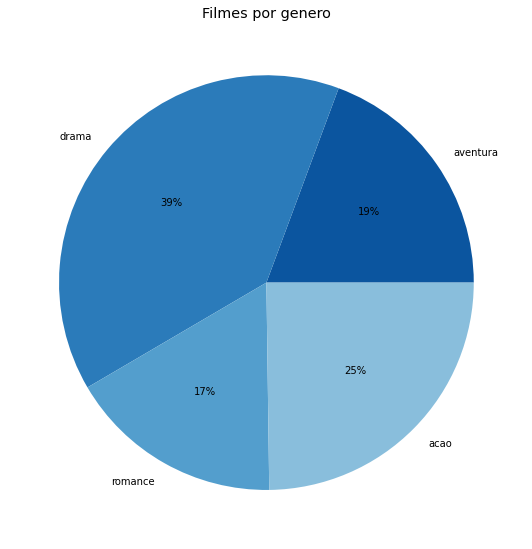

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (9,9)

#define data
data =    [aventura, drama, romance, acao] #f6.percent
labels = ['aventura', 'drama', 'romance', 'acao'] #, 'outros'] #df.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')#[0:4]

colors = sns.color_palette("rocket")

colors = sns.color_palette("Blues_r") 

#colors = 'Blues'



fig = plt.figure()

#ax = fig.add_axes([.8, .8, .8, .8], aspect=2)

ax = fig.add_axes([.8, .8, .8, .8], aspect=2)
ax.set_title('Filmes por genero')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

In [ ]:
dfo = dffilmes.rating.value_counts()
dfo

In [ ]:
type(dfo)

In [ ]:
df2 = dfo.to_frame().reset_index()
df2.columns = ['rating', 'quantidade']

In [ ]:
df2

In [ ]:
df2['percent'] = df2['quantidade'] / df2['quantidade'].sum() * 100
df2

In [ ]:
# formatar a saída

df3 = df2.style.format({
    "rating": "{:.1f}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})



df3

In [ ]:
df4 = df2[ df2.percent >= 7]
df4

In [ ]:
df4.percent.sum()

In [ ]:
print('{:,d}'.format(df4.quantidade.sum()))

In [ ]:
df5 = df2[ df2.percent < 7]
df5

In [ ]:
print('{:,d}'.format(df5.quantidade.sum()))

In [ ]:
df5.percent.sum()

In [ ]:
df5

In [ ]:
row = {'rating': 'outros', 'quantidade': df5.quantidade.sum(), 'percent': df5.percent.sum()  }
row

In [ ]:
df6 = df4.append(row, ignore_index=True)
df6

In [ ]:
# formatar a saída

dfs = df6.style.format({
    "rating": "{}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})

dfs

In [ ]:
df6.to_csv('ratings_saida.csv', index=False)

In [ ]:
!cat ratings_saida.csv

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (9,9)

#define data
data = df6.percent
labels = df6.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

colors = sns.color_palette("Blues_r")

colors = sns.color_palette("Reds_r")[0:7]

colors = sns.color_palette("Blues_r")[0:7]


colors = sns.color_palette("Oranges_r")[0:8]


fig = plt.figure()

ax = fig.add_axes([0, 0, .8, .8], aspect=1)

ax.set_title('Filmes por avaliação (1-5)')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

# 1 Bilhão de Registros

In [ ]:
!ls ~/Downloads/ml-20mx16x32

In [ ]:
pwd

In [ ]:
#!pip install -q npzviewer

In [ ]:
%%time
import numpy as np

url  = '/Users/valencar/Downloads/ml-20mx16x32/'
n = np.load(url + 'testx16x32_0.npz')

In [ ]:
 n.files

In [ ]:
n['arr_0'].shape

In [ ]:
n['arr_0'][20]

In [ ]:
%%time
import pandas as pd

url = 

df = pd.read_csv(url)
df.head